In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import logging
logger = logging.getLogger('matplotlib')
logger.setLevel(logging.INFO)
import os
os.getcwd()

'C:\\Users\\up332\\Desktop\\My Data'

In [40]:
def tdma(l,d,u,b,n):
    
    g=np.zeros(n); h=np.zeros(n); sol=np.zeros(n);
    g[0]=d[0]; h[0]=b[0]
    for i in range(n):
        if i>0:
            g[i]=d[i]-l[i]*u[i-1]/g[i-1]
            h[i]=b[i]-l[i]*h[i-1]/g[i-1]
    sol[-1]=h[-1]/g[-1];
    i=n-2
    while i>=0:
        
        sol[i]=(h[i]-u[i]*sol[i+1])/g[i]
        i-=1
    #print('\nsol is---\n',sol)
    
    return(sol)


In [67]:
a=1.6*10**(-5);  #alpha in m2/s
#k=61;  #conductivity in W/mK =(W/mC)
xm=1; ym=1;  #x and y max in m (in 1st quad)
x0=0; y0=0;
T0=50;  #Initial temp in C
Tinf=25;  #Outside temp in C
#h=400;  #heat trans coeff in W/m2K (=W/m2C)
tmax=30000;  #calc at this time (in s)

nx=10; ny=10;  #nx*ny grid (no. of pts are nx+1*ny+1)
dx=xm/nx; dy=ym/ny;
dt=1; #time stepping in s

rx = (a*dt)/(dx**2); ry = (a*dt)/(dy**2);
print(rx)
Told= T0 * (np.ones((ny,nx))); Tnew=T0*(np.ones((ny,nx)));l=np.zeros(nx);d=np.zeros(nx);u=np.zeros(nx);T=np.zeros((nx,nx))
Told[:,0]=200
Told[0,0]=150
Told[-1,0]=150
Told[0,1:nx-1]=100
Told[-1,1:nx-1]=100
Told[:,-1]=100
#T = Told.copy()
print(Told)

0.0015999999999999999
[[150. 100. 100. 100. 100. 100. 100. 100. 100. 100.]
 [200.  50.  50.  50.  50.  50.  50.  50.  50. 100.]
 [200.  50.  50.  50.  50.  50.  50.  50.  50. 100.]
 [200.  50.  50.  50.  50.  50.  50.  50.  50. 100.]
 [200.  50.  50.  50.  50.  50.  50.  50.  50. 100.]
 [200.  50.  50.  50.  50.  50.  50.  50.  50. 100.]
 [200.  50.  50.  50.  50.  50.  50.  50.  50. 100.]
 [200.  50.  50.  50.  50.  50.  50.  50.  50. 100.]
 [200.  50.  50.  50.  50.  50.  50.  50.  50. 100.]
 [150. 100. 100. 100. 100. 100. 100. 100. 100. 100.]]


In [68]:
t=dt
while t <= tmax:
    T = Tnew.copy()
    l[0]=0
    l[1:nx-1] =-rx
    l[-1] = -rx
    d[:]=2*(1+rx)
    u[0:nx-1]=-rx       #upper diagonal
    u[-1]=0
    #u[0]=0
    #print(l,d,u)
    b=np.zeros(nx);  #RHS vector
    j=0
    #Y sweep
    for j in range(nx):
        if j >0 and j<nx-1:
            #b[0]=387.5
            for i in range(nx):
                
                if i<nx:
                    
                    b[i]=  rx*Told[j+1,i] + 2*(1-rx)*(Told[j,i]) + (rx*Told[j-1,i])  #interior pts
                    #b[i]=  (0.5*rx*(Told[j+1,i]))+((1-2*rx)*Told[j,i])+(rx*Told[j-1,i])
            #b[-1]=200;  #BCx2
                    #print(b)
            Tnew[j,:]=(tdma(l,d,u,b,nx))
    Tnew[:,0] = 200
    Tnew[:,-1]=100
    Tnew[0,:]=100;  #BCy1
    Tnew[0,0]=150;
    Tnew[-1,:]=100;  #BCy2
    Tnew[-1,0]=150
    
    Told=Tnew.copy();
    #print('\n-----T aftr x sweepis---\n', Tnew)

    #Step 2 x sweep
    l[0]=0
    l[1:nx-1] =-rx
    l[-1] = -rx
    d[:]=2*(1+rx)
    u[1:nx-1]=-rx       #upper diagonal
    u[-1]=0
    b=np.zeros(ny);  #RHS vector
    for i in range(ny):
        if i >0 and i<nx-1:
            #b[0]=100;  #BCy1
            for j in range(ny):
                if j<nx:
                    #b[j]=  (0.5*rx*(Told[j,i+1]))+((1-2*rx)*Told[j,i])+(rx*Told[j,i-1])

                    b[j]=  rx*Told[j,i+1] + 2*(1-rx)*(Told[j,i])+ (rx*Told[j,i-1])  #interior pts
            #b[-1]=100;  #BCy2
            Tnew[:,i]=(tdma(l,d,u,b,ny));  #solve and store
    
    Tnew[0,:] = 100
    Tnew[-1,:] = 100
    Tnew[:,0]=200;  #BCx1
    Tnew[0,0] = 150
    Tnew[-1,0] = 150
    Tnew[:,-1]=100;  #BCx2
    #print('\nnew is----\n',Tnew)
    if t>5:
        o = abs(Tnew - T)
        oe = o.max()
        if oe<1e-6:
            print('\n-----------\n---brekd---\n',t)
            break
    
    Told=Tnew.copy();  #update
    
    
    t+=dt
print(Tnew)


-----------
---brekd---
 27740
[[150.         100.         100.         100.         100.
  100.         100.         100.         100.         100.        ]
 [200.         148.56860704 127.55409585 117.18676978 111.23669835
  107.43606985 104.81449428 102.87855101 101.3309667  100.        ]
 [200.         166.84114448 144.49019598 129.98954956 120.35962009
  113.73027061 108.9815607  105.4077029  102.52416927 100.        ]
 [200.         174.39888217 153.57633473 137.92197098 126.48236965
  118.14423958 111.97413362 107.24682797 103.39701491 100.        ]
 [200.         177.2681925  157.49472047 141.64011312 129.5041973
  120.39073383 113.52438933 108.20884993 103.85577099 100.        ]
 [200.         177.2681925  157.49472047 141.64011312 129.5041973
  120.39073383 113.52438933 108.20884993 103.85577099 100.        ]
 [200.         174.39888217 153.57633473 137.92197098 126.48236965
  118.14423958 111.97413362 107.24682797 103.39701491 100.        ]
 [200.         166.84114448 144.4

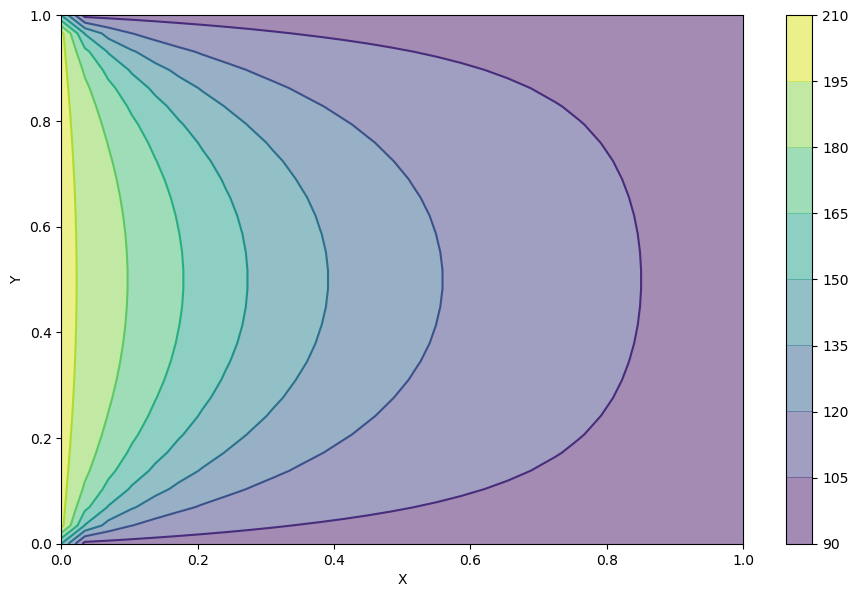

In [66]:
#-------------ploting
x = np.linspace(0, xm,nx)
y = np.linspace(0, xm,ny)

  
# Creating 2-D grid of features
X, Y = np.meshgrid(x, y)
Z = Tnew

fig = plt.figure(figsize=(11, 7), dpi=100)
plt.contourf(X, Y, Z, alpha=0.5, cmap=cm.viridis)
plt.colorbar()
plt.contour(X, Y, Z, cmap=cm.viridis)
#plt.quiver(X[::2, ::2], Y[::2, ::2], u[::2, ::2], v[::2, ::2])
plt.xlabel('X')
plt.ylabel('Y');

In [6]:
#def tdma(l,d,u,b,n):
    
#    g=np.zeros(n); h=np.zeros(n); sol=np.zeros(n);
 #   #g[0]=d[0]; h[0]=b[0]
  #  for i in range(n):
   #     denom = d[i]+(l[i] * g[i-1])
    #    g[i] = - (u[i]/denom)
     #   h[i] = (d[i] - l[i] * h[i-1])/denom
#    i=n-2
 #   while i>=0:
  #      
   #     sol[i]=g[i]*sol[i+1]+h[i]
    #    i-=1
    #print('\nsol is---\n',sol)
    
    #return(sol)